In [1]:
import sys
import os
import csv
import config

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
%matplotlib inline

PROJECT_PATH = config.data_directory

# load dataFrame
df = pd.read_csv('{}/{}.csv'.format(PROJECT_PATH, 'engSongs'))
df.head()

,id,name,popularity,duration_ms,explicit,artist,artist_id,album,album_id,album_release_date,...,lyrics,is_english,t_entities,subjectivity,polarity,positivity,neutrality,negativity,afinn_score,custom_afinn_score
0,57bgtoPSgt236HzfBOd8kj,Thunderstruck,80,292880,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,Thunder [x10] I was caught In the middle of ...,True,"{(384, 'Beating'): 'GPE', (380, 'Thunderstruck...",0.399074,0.275926,0.232,0.664,0.104,22.0,10.0
1,5u5F7qLDvZjBSktaDp4HxB,Moneytalks,62,225946,0,AC/DC,711MCceyCBcFnzjGY4Q7Un,The Razors Edge,4vu7F6h90Br1ZtYYaqfITy,1990-09-24,...,"Tailored suits, chauffeured cars Fine hotels...",True,"{(390, 'the Moneytalk Come'): 'LAW', (381, 'Fr...",0.330324,0.042593,0.025,0.961,0.014,5.0,6.0
2,5pKJtX4wBeby9qIfFhyOJj,Don't Go Breaking My Heart,69,271133,0,Elton John,3PhoLpVuITZKcymswpck5b,To Be Continued...,7iKDBfOFUtg8E8RbuDhiux,1990-11-08,...,Don't go breaking my heart I couldn't if I t...,True,"{(383, 'Baby'): 'ORG'}",0.563757,0.154497,0.009,0.971,0.019,16.0,-1.0
3,7em38Hh2sKwnZ1HDgxvg82,Circle Of Life,47,290093,0,Elton John,3PhoLpVuITZKcymswpck5b,Love Songs,1bnoqPJyaxMCtYuSprcBTD,1995-11-06,...,"From the day we arrive on the planet And, bl...",True,"{(391, 'the day'): 'DATE', (384, 'Keeps'): 'GPE'}",0.538571,0.221006,0.125,0.846,0.029,14.0,4.0
4,6gZVQvQZOFpzIy3HblJ20F,Man in the Box,70,284426,1,Alice In Chains,64tNsm6TnZe2zpcMVMOoHL,Facelift,5LbHbwejgZXRZAgzVAjkhj,1990,...,I'm the man in the box [Album version:] Buri...,True,"{(380, 'Jesus Christ'): 'PERSON', (383, 'Music...",0.566667,0.058333,0.079,0.768,0.153,-3.0,-4.0


In [3]:
df["genres"].describe()

count                                                  1026
unique                                                  660
top       ['contemporary country', 'country', 'country r...
freq                                                     15
Name: genres, dtype: object

In [4]:
df['album_release_date'].describe()

count           1026
unique           587
top       2006-01-01
freq              16
Name: album_release_date, dtype: object

In [5]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'],infer_datetime_format=True)

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64']).copy()
df_num.head()

,popularity,duration_ms,explicit,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,subjectivity,polarity,positivity,neutrality,negativity,afinn_score,custom_afinn_score
0,80,292880,0,12,0.501,0.889,4,-5.175,1,0.0364,...,0.2170,0.257,133.519,0.399074,0.275926,0.232,0.664,0.104,22.0,10.0
1,62,225946,0,12,0.650,0.903,7,-3.677,1,0.0314,...,0.1220,0.409,121.896,0.330324,0.042593,0.025,0.961,0.014,5.0,6.0
2,69,271133,0,67,0.743,0.858,5,-7.790,1,0.0416,...,0.0685,0.779,131.312,0.563757,0.154497,0.009,0.971,0.019,16.0,-1.0
3,47,290093,0,15,0.276,0.607,10,-8.089,1,0.0369,...,0.1070,0.157,160.450,0.538571,0.221006,0.125,0.846,0.029,14.0,4.0
4,70,284426,1,12,0.346,0.765,8,-8.558,1,0.0413,...,0.2130,0.644,106.463,0.566667,0.058333,0.079,0.768,0.153,-3.0,-4.0


In [7]:
# Get column names first
names = df_num.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit data on the scaler object
scaled = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled, columns=names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


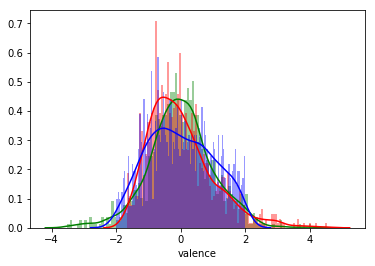

In [8]:
sns.distplot(scaled_df['polarity'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['positivity'], color='r', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(scaled_df['valence'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
# Compute the correlation matrix
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
for i in range(0, len(scaled_df.columns), 5):
    sns.pairplot(data=scaled_df,
                x_vars=scaled_df.columns[i:i+5],
                y_vars=['positivity'])

In [9]:
for index, row in df.iterrows():
    array = eval(df.loc[index, 'genres'])
    # Iterate and create new columns, with the 0 and 1 encoding
    for r in array:
        df["%s" % r] = df["genres"].apply(
            lambda l: 1 if r in l else 0)

In [10]:
df_num_date = df.select_dtypes(include = ['datetime64', 'float64', 'int64']).copy()

df_num_date[names] = scaled

df_num_date.head()

,popularity,duration_ms,explicit,album_release_date,album_total_tracks,danceability,energy,key,loudness,mode,...,austindie,teen pop,show tunes,indonesian jazz,deep talent show,bedroom soul,nc hip hop,pop folk,stomp and flutter,australian electropop
0,4.369686,0.873951,-0.502740,1990-09-24,-0.256394,-0.449866,0.964756,-0.372739,0.637845,0.659519,...,0,0,0,0,0,0,0,0,0,0
1,1.703173,-0.203905,-0.502740,1990-09-24,-0.256394,0.491081,1.028788,0.467767,1.098487,0.659519,...,0,0,0,0,0,0,0,0,0,0
2,2.740150,0.523754,-0.502740,1990-11-08,6.156876,1.078383,0.822971,-0.092570,-0.166280,0.659519,...,0,0,0,0,0,0,0,0,0,0
3,-0.518922,0.829072,-0.502740,1995-11-06,0.093420,-1.870760,-0.325028,1.308273,-0.258224,0.659519,...,0,0,0,0,0,0,0,0,0,0
4,2.888290,0.737814,1.989101,1990-01-01,-0.256394,-1.428704,0.397617,0.747935,-0.402444,0.659519,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_num_date['afinn_score'].describe()

count    1.026000e+03
mean     2.748505e-17
std      1.000488e+00
min     -7.460865e+00
25%     -2.675366e-01
50%      7.384171e-02
75%      4.335081e-01
max      4.145997e+00
Name: afinn_score, dtype: float64

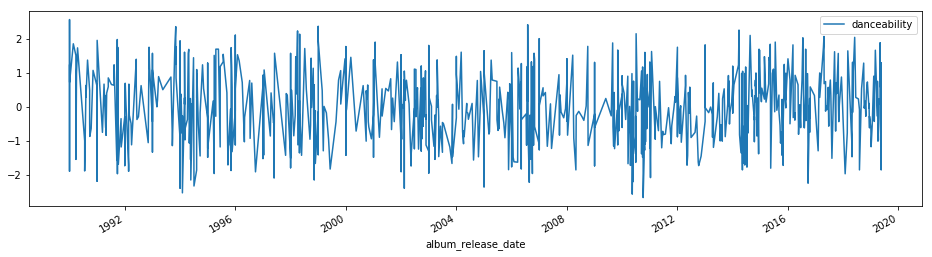

In [12]:
dance = pd.Series(data=df_num_date['danceability'].values, index=df_num_date['album_release_date'])
dance.plot(figsize=(16,4), label="danceability", legend=True)

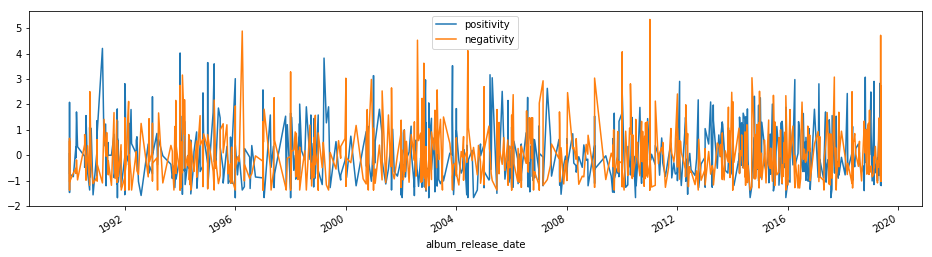

In [13]:
p = pd.Series(data=df_num_date['positivity'].values, index=df_num_date['album_release_date'])
p.plot(figsize=(16,4), label="positivity", legend=True)
n = pd.Series(data=df_num_date['negativity'].values, index=df_num_date['album_release_date'])
n.plot(figsize=(16,4), label="negativity", legend=True)

In [14]:
df_num_date['rock'].describe()

count    1026.000000
mean        0.495127
std         0.500220
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: rock, dtype: float64

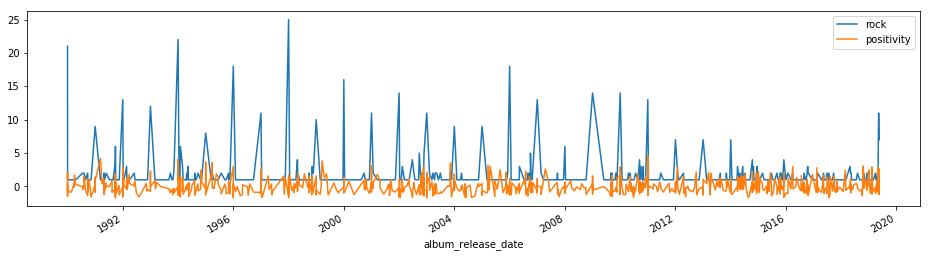

In [15]:
dcn = df_num_date.groupby(['album_release_date'])['rock'].count()
dcn.plot(figsize=(16,4), label="rock", legend=True)
p = pd.Series(data=df_num_date['positivity'].values, index=df_num_date['album_release_date'])
p.plot(figsize=(16,4), label="positivity", legend=True)

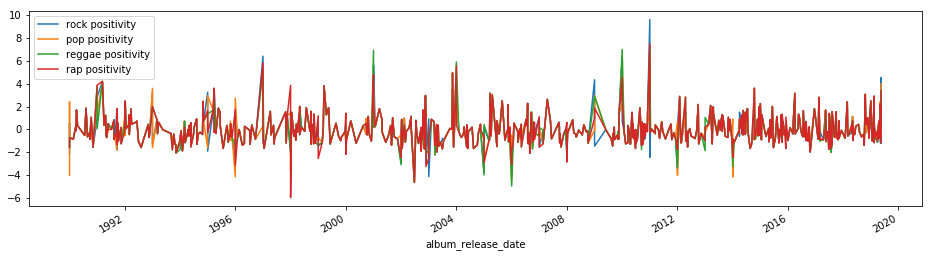

In [16]:
dfrock = df_num_date.groupby(['album_release_date', 'rock'])['positivity'].sum().reset_index(name='positivity')
rock = pd.Series(data=dfrock['positivity'].values, index=dfrock['album_release_date'])
rock.plot(figsize=(16,4), label="rock positivity", legend=True)
dfpop = df_num_date.groupby(['album_release_date', 'pop'])['positivity'].sum().reset_index(name='positivity')
pop = pd.Series(data=dfpop['positivity'].values, index=dfpop['album_release_date'])
pop.plot(figsize=(16,4), label="pop positivity", legend=True)
dfreggae = df_num_date.groupby(['album_release_date', 'reggae'])['positivity'].sum().reset_index(name='positivity')
reggae = pd.Series(data=dfreggae['positivity'].values, index=dfreggae['album_release_date'])
reggae.plot(figsize=(16,4), label="reggae positivity", legend=True)
dfrap = df_num_date.groupby(['album_release_date', 'rap'])['positivity'].sum().reset_index(name='positivity')
rap = pd.Series(data=dfrap['positivity'].values, index=dfrap['album_release_date'])
rap.plot(figsize=(16,4), label="rap positivity", legend=True)

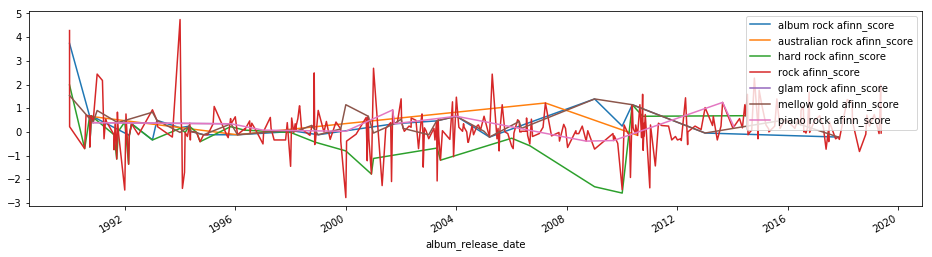

In [17]:
for i in range(23, len(df_num_date.columns) - 454, 1):
    dfrock = df_num_date[df_num_date.iloc[:,i] == 1].groupby(['album_release_date'])['afinn_score'].sum().reset_index(name='afinn_score')
    rap = pd.Series(data=dfrock['afinn_score'].values, index=dfrock['album_release_date'])
    rap.plot(figsize=(16,4), label=df_num_date.iloc[:,i].name + " afinn_score", legend=True)

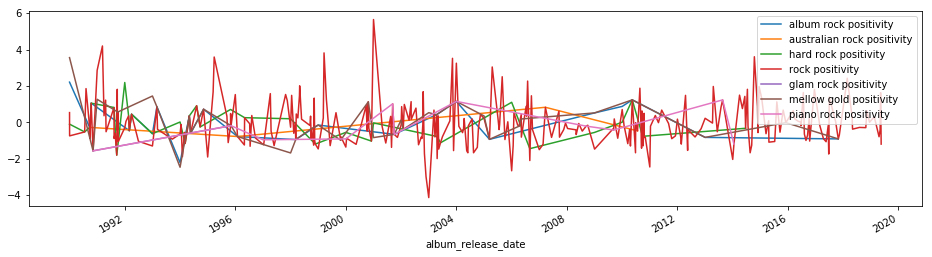

In [18]:
for i in range(23, len(df_num_date.columns) - 454, 1):
    dfrock = df_num_date[df_num_date.iloc[:,i] == 1].groupby(['album_release_date'])['positivity'].sum().reset_index(name='positivity')
    rap = pd.Series(data=dfrock['positivity'].values, index=dfrock['album_release_date'])
    rap.plot(figsize=(16,4), label=df_num_date.iloc[:,i].name + " positivity", legend=True)

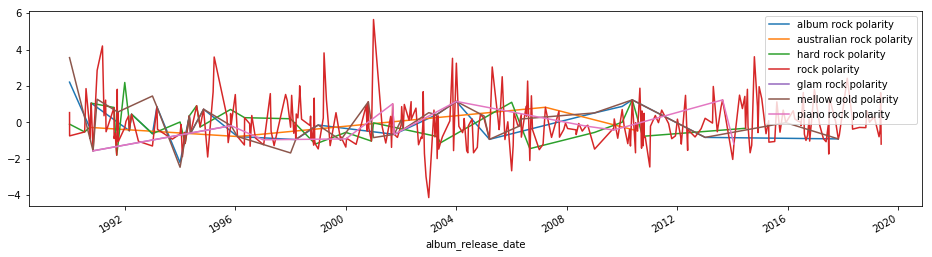

In [20]:
for i in range(23, len(df_num_date.columns) - 454, 1):
    dfrock = df_num_date[df_num_date.iloc[:,i] == 1].groupby(['album_release_date'])['positivity'].sum().reset_index(name='polarity')
    rap = pd.Series(data=dfrock['polarity'].values, index=dfrock['album_release_date'])
    rap.plot(figsize=(16,4), label=df_num_date.iloc[:,i].name + " polarity", legend=True)

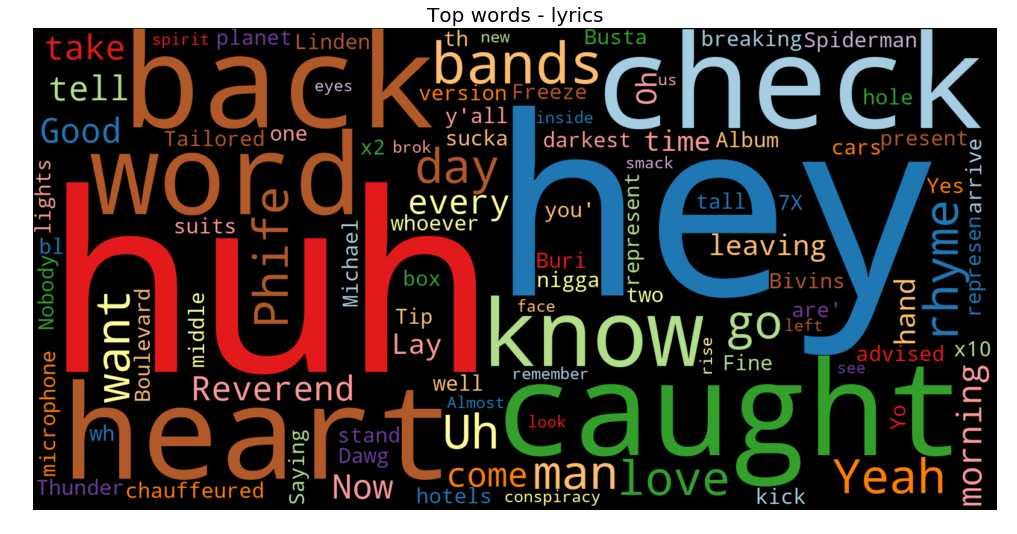

In [19]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 


wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100,colormap="Paired", background_color='black',)
wordcloud.generate(str(df['lyrics']))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top words - lyrics", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()